<a href="https://colab.research.google.com/github/punramon/bsc_dpdm24/blob/main/Project_%E0%B8%AD%E0%B8%A2%E0%B8%B2%E0%B8%81%E0%B8%81%E0%B8%94%E0%B9%81%E0%B8%81%E0%B8%A3%E0%B9%89%E0%B8%9A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import data

In [ ]:
import kagglehub
import pandas as pd

# Download latest version of the dataset
dataset_path = kagglehub.dataset_download("mzohaibzeeshan/thyroid-cancer-risk-dataset")

# Load the dataset into a DataFrame
thyroid_df = pd.read_csv(f"{dataset_path}/thyroid_cancer_risk_data.csv")

print("Path to dataset files:", dataset_path)
print(thyroid_df.head())  # แสดงตัวอย่างข้อมูล


Path to dataset files: /root/.cache/kagglehub/datasets/mzohaibzeeshan/thyroid-cancer-risk-dataset/versions/1
   Patient_ID  Age  Gender  Country  Ethnicity Family_History  \
0           1   66    Male   Russia  Caucasian             No   
1           2   29    Male  Germany   Hispanic             No   
2           3   86    Male  Nigeria  Caucasian             No   
3           4   75  Female    India      Asian             No   
4           5   35  Female  Germany    African            Yes   

  Radiation_Exposure Iodine_Deficiency Smoking Obesity Diabetes  TSH_Level  \
0                Yes                No      No      No       No       9.37   
1                Yes                No      No      No       No       1.83   
2                 No                No      No      No       No       6.26   
3                 No                No      No      No       No       4.10   
4                Yes                No      No      No       No       9.10   

   T3_Level  T4_Level  Nodule_S

# data prepareration

In [ ]:
thyroid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212691 entries, 0 to 212690
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Patient_ID           212691 non-null  int64  
 1   Age                  212691 non-null  int64  
 2   Gender               212691 non-null  object 
 3   Country              212691 non-null  object 
 4   Ethnicity            212691 non-null  object 
 5   Family_History       212691 non-null  object 
 6   Radiation_Exposure   212691 non-null  object 
 7   Iodine_Deficiency    212691 non-null  object 
 8   Smoking              212691 non-null  object 
 9   Obesity              212691 non-null  object 
 10  Diabetes             212691 non-null  object 
 11  TSH_Level            212691 non-null  float64
 12  T3_Level             212691 non-null  float64
 13  T4_Level             212691 non-null  float64
 14  Nodule_Size          212691 non-null  float64
 15  Thyroid_Cancer_Ri

In [ ]:
thyroid_df.head()

,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,4,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,5,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign


## แบ่งช่วงอายุ
https://integrishealth.org/resources/on-your-health/2015/october/stages-of-life-health-for-every-age#:~:text=Child%20%3D%205%2D12%20yrs,Age%20Adult%20%3D%2040%2D59%20yrs

Child = < 12 yrs


Teen = 13-19 yrs


Adult = 20-39 yrs


Middle Age Adult = 40-59 yrs


Senior Adult = 60+

In [ ]:
def age_group(age):
    if age < 12:
        return 'Child'
    elif 13 <= age < 20:
        return 'Teen'
    elif 20 <= age < 40:
        return 'Adult'
    elif 40 <= age < 60:
        return 'Adult'
    else:
        return 'Senior'

# สร้างคอลัมน์ใหม่สำหรับช่วงอายุ
thyroid_df['Age_Group'] = thyroid_df['Age'].apply(age_group)

In [ ]:
thyroid_df.head()

,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis,Age_Group
0,1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign,Senior
1,2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign,Adult
2,3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign,Senior
3,4,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign,Senior
4,5,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign,Adult


## แบ่งช่วงขนาดก้อนเนื้อ
https://www.endocrinemds.com/blogs/what-size-thyroid-nodule-should-you-worry-about/#:~:text=A%20small%20nodule%20with%20a,by%20The%20American%20Thyroid%20Association.

In [ ]:
def Nodule_Size(nd):
    if nd < 1:
        return '< 1'
    elif 1 <= nd < 2:
        return '1'
    elif 2 <= nd < 3:
        return '2'
    elif 3 <= nd < 4:
        return '3'
    elif 4 <= nd < 5:
        return '4'
    elif 5 <= nd < 6:
        return '5'
    else:
        return '>= 5'

thyroid_df['Nodule_Size_int'] = thyroid_df['Nodule_Size'].apply(Nodule_Size)
thyroid_df.head()

,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis,Age_Group,Nodule_Size_int
0,1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign,Senior,1
1,2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign,Adult,4
2,3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign,Senior,4
3,4,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign,Senior,2
4,5,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign,Adult,2


## แบ่งช่วง tsh t3 t4

https://blallab.com/blogs/tsh-thyroid-test-what-is-normal-range-of-T3-T4-TSH

In [ ]:
print(thyroid_df['T4_Level'].unique())


[ 6.16 10.54 10.57 11.04 10.71  5.52 11.73  9.47 11.89  4.51  8.17  9.56
  6.13  6.    6.8  11.82 11.5   4.95  5.66  7.89 10.24  7.67  9.7   7.93
 11.41  6.63  4.73  6.48 10.98  8.83  6.52  8.77 11.21 10.8   8.31  6.4
  7.95  5.74  7.24  6.26 10.02  4.65  5.76  6.64  6.98 10.85  8.81  7.04
  4.84 10.39  8.85  7.4  10.64  9.04  9.36 10.99  8.82  7.26 11.37 11.95
  9.17  5.05  9.05  8.44 10.58  7.43  6.97  4.9   5.96 10.2   9.71  5.31
 11.31  8.49  9.96  8.45  8.43 11.52 11.33  9.43  7.47  9.09 10.33 11.09
 10.5   8.14  6.51 11.8   7.71  9.89  4.61 10.36  8.48  7.84  5.62  5.79
  6.35  9.65  5.11  5.48  5.08  8.86 11.99  8.89  6.93  7.99 11.62  9.67
  7.66 11.54  6.75  4.59  4.76  4.64 10.91  7.52 11.3   4.78  9.11 10.6
  6.19  8.18 11.   11.6   8.29  4.7   9.57 10.52  6.03  9.45  6.53  7.2
  9.32  6.14 10.22  5.93  6.11  6.67  8.08  8.52 10.01 11.11  5.81 11.84
  8.57  5.42 11.34  8.76  8.5  10.78  7.63  8.27  6.82  8.01 11.85  9.52
 11.78 10.89  4.98  8.63  6.31  5.27  8.02  5.12 10.43

What are the T3, T4, and TSH Tests Normal Ranges?
The normal ranges for T3, T4, and TSH test may vary slightly between laboratories. However, generally:

TSH Normal Range: 0.4 to 4.0 milli-International Units per liter (mIU/L)

T4 Normal Range: 4.5 to 11.5 micrograms per deciliter (mcg/dL)

T3 Normal Range: 70 to 200 nanograms per deciliter (ng/dL) --> 0.07 - 0.2 mcg/dL

In [ ]:
def categorize_tsh_level(tsh):
    if tsh < 0.4:
        return 'Low'
    elif 0.4 <= tsh <= 4:
        return 'Normal'
    elif 4 < tsh <= 10:
        return 'High'

# ใช้ฟังก์ชันในการแบ่งกลุ่มข้อมูล
thyroid_df['TSH_Category'] = thyroid_df['TSH_Level'].apply(categorize_tsh_level)
thyroid_df.head()

,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis,Age_Group,Nodule_Size_int,TSH_Category
0,1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign,Senior,1,High
1,2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign,Adult,4,Normal
2,3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign,Senior,4,High
3,4,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign,Senior,2,High
4,5,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign,Adult,2,High


In [ ]:
import pandas as pd

def determine_t3_status(row):
    age = row['Age']
    t3_level = row['T3_Level']

    if 1 <= age <= 5:
        if t3_level < 1.06:
            return 'Low'
        elif t3_level > 2.03:
            return 'High'
        else:
            return 'Normal'
    elif 6 <= age <= 10:
        if t3_level < 1.04:
            return 'Low'
        elif t3_level > 1.83:
            return 'High'
        else:
            return 'Normal'
    elif 11 <= age <= 14:
        if t3_level < 0.68:
            return 'Low'
        elif t3_level > 1.86:
            return 'High'
        else:
            return 'Normal'
    elif 15 <= age <= 17:
        if t3_level < 0.71:
            return 'Low'
        elif t3_level > 1.75:
            return 'High'
        else:
            return 'Normal'
    elif 18 <= age <= 99:
        if t3_level < 0.79:
            return 'Low'
        elif t3_level > 1.65:
            return 'High'
        else:
            return 'Normal'
    else:
        return 'Age out of range'

thyroid_df['T3_Category'] = thyroid_df.apply(determine_t3_status, axis=1)
thyroid_df.head()

,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,...,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis,Age_Group,Nodule_Size_int,TSH_Category,T3_Category
0,1,66,Male,Russia,Caucasian,No,Yes,No,No,No,...,9.37,1.67,6.16,1.08,Low,Benign,Senior,1,High,High
1,2,29,Male,Germany,Hispanic,No,Yes,No,No,No,...,1.83,1.73,10.54,4.05,Low,Benign,Adult,4,Normal,High
2,3,86,Male,Nigeria,Caucasian,No,No,No,No,No,...,6.26,2.59,10.57,4.61,Low,Benign,Senior,4,High,High
3,4,75,Female,India,Asian,No,No,No,No,No,...,4.10,2.62,11.04,2.46,Medium,Benign,Senior,2,High,High
4,5,35,Female,Germany,African,Yes,Yes,No,No,No,...,9.10,2.11,10.71,2.11,High,Benign,Adult,2,High,High


In [ ]:
def categorize_t4_level(t4):
    if t4 < 4.5:
        return 'Low'
    elif 4.5 <= t4 <= 11.5:
        return 'Normal'
    else:
        return 'High'

# ใช้ฟังก์ชันในการแบ่งกลุ่มข้อมูล
thyroid_df['T4_Category'] = thyroid_df['T4_Level'].apply(categorize_t4_level)
thyroid_df.head()

,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,...,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis,Age_Group,Nodule_Size_int,TSH_Category,T3_Category,T4_Category
0,1,66,Male,Russia,Caucasian,No,Yes,No,No,No,...,1.67,6.16,1.08,Low,Benign,Senior,1,High,High,Normal
1,2,29,Male,Germany,Hispanic,No,Yes,No,No,No,...,1.73,10.54,4.05,Low,Benign,Adult,4,Normal,High,Normal
2,3,86,Male,Nigeria,Caucasian,No,No,No,No,No,...,2.59,10.57,4.61,Low,Benign,Senior,4,High,High,Normal
3,4,75,Female,India,Asian,No,No,No,No,No,...,2.62,11.04,2.46,Medium,Benign,Senior,2,High,High,Normal
4,5,35,Female,Germany,African,Yes,Yes,No,No,No,...,2.11,10.71,2.11,High,Benign,Adult,2,High,High,Normal


In [ ]:
thyroid_df.head()

,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,...,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis,Age_Group,Nodule_Size_int,TSH_Category,T3_Category,T4_Category
0,1,66,Male,Russia,Caucasian,No,Yes,No,No,No,...,1.67,6.16,1.08,Low,Benign,Senior,1,High,High,Normal
1,2,29,Male,Germany,Hispanic,No,Yes,No,No,No,...,1.73,10.54,4.05,Low,Benign,Adult,4,Normal,High,Normal
2,3,86,Male,Nigeria,Caucasian,No,No,No,No,No,...,2.59,10.57,4.61,Low,Benign,Senior,4,High,High,Normal
3,4,75,Female,India,Asian,No,No,No,No,No,...,2.62,11.04,2.46,Medium,Benign,Senior,2,High,High,Normal
4,5,35,Female,Germany,African,Yes,Yes,No,No,No,...,2.11,10.71,2.11,High,Benign,Adult,2,High,High,Normal


In [ ]:
thyroid_df_selected = thyroid_df[['Gender', 'Age_Group', 'Country', 'Ethnicity', 'Family_History', 'Radiation_Exposure', 'Iodine_Deficiency',
                                 'Smoking', 'Obesity', 'Diabetes','Thyroid_Cancer_Risk','TSH_Category', 'T3_Category', 'T4_Category',
                                 'Nodule_Size_int', 'Diagnosis']]

In [ ]:
from sklearn.preprocessing import LabelEncoder
# สร้าง LabelEncoder object
le = LabelEncoder()

# สร้าง Dictionary เพื่อเก็บ Mapping ของแต่ละคอลัมน์
label_mappings = {}

# ตรวจสอบและแปลงเฉพาะคอลัมน์ที่เป็น object
for column in thyroid_df.columns:
    if thyroid_df[column].dtype != 'object':
        thyroid_df[column] = thyroid_df[column].astype('object')

# เข้ารหัสและแสดง mapping
for column in thyroid_df.columns:
    if thyroid_df[column].dtype == 'object':
        thyroid_df[column] = le.fit_transform(thyroid_df[column])
        label_mappings[column] = dict(zip(le.classes_, le.transform(le.classes_)))
        print(f"Value Encoding for column '{column}':")
        for original, encoded in label_mappings[column].items():
            print(f"  {original}: {encoded}")
        print()

Value Encoding for column 'Gender':
  Female: 0
  Male: 1

Value Encoding for column 'Age_Group':
  Adult: 0
  Senior: 1
  Teen: 2

Value Encoding for column 'Country':
  Brazil: 0
  China: 1
  Germany: 2
  India: 3
  Japan: 4
  Nigeria: 5
  Russia: 6
  South Korea: 7
  UK: 8
  USA: 9

Value Encoding for column 'Ethnicity':
  African: 0
  Asian: 1
  Caucasian: 2
  Hispanic: 3
  Middle Eastern: 4

Value Encoding for column 'Family_History':
  2: 0
  No: 1
  Yes: 2

Value Encoding for column 'Radiation_Exposure':
  No: 0
  Yes: 1

Value Encoding for column 'Iodine_Deficiency':
  No: 0
  Yes: 1

Value Encoding for column 'Smoking':
  No: 0
  Yes: 1

Value Encoding for column 'Obesity':
  No: 0
  Yes: 1

Value Encoding for column 'Diabetes':
  No: 0
  Yes: 1

Value Encoding for column 'Thyroid_Cancer_Risk':
  High: 0
  Low: 1
  Medium: 2

Value Encoding for column 'TSH_Category':
  High: 0
  Low: 1
  Normal: 2

Value Encoding for column 'T3_Category':
  High: 0
  Low: 1
  Normal: 2

Value 

In [ ]:
#thyroid_df_selected.to_csv('thyroid_df_encoding.csv', index=False)

* แยกเซฟเพราะติดลิมิตโคแลปเวลารันโมเดล - เซฟไว้จะได้ไม่ต้อง preprocess ใหม่อีกรอบ

# Model

dataset : https://drive.google.com/file/d/1GSLS0glsyGJUc2HaCNkFj5-SI10Sfxpr/view?usp=sharing

Value Encoding for column 'Gender':
  Female: 0
  Male: 1

Value Encoding for column 'Age_Group':
  Adult: 0
  Senior: 1
  Teen: 2

Value Encoding for column 'Country':
  Brazil: 0
  China: 1
  Germany: 2
  India: 3
  Japan: 4
  Nigeria: 5
  Russia: 6
  South Korea: 7
  UK: 8
  USA: 9

Value Encoding for column 'Ethnicity':
  African: 0
  Asian: 1
  Caucasian: 2
  Hispanic: 3
  Middle Eastern: 4

Value Encoding for column 'Family_History':
  No: 0
  Yes: 1

Value Encoding for column 'Radiation_Exposure':
  No: 0
  Yes: 1

Value Encoding for column 'Iodine_Deficiency':
  No: 0
  Yes: 1

Value Encoding for column 'Smoking':
  No: 0
  Yes: 1

Value Encoding for column 'Obesity':
  No: 0
  Yes: 1

Value Encoding for column 'Diabetes':
  No: 0
  Yes: 1

Value Encoding for column 'Thyroid_Cancer_Risk':
  High: 0
  Low: 1
  Medium: 2

Value Encoding for column 'TSH_Category':
  High: 0
  Low: 1
  Normal: 2

Value Encoding for column 'T3_Category':
  High: 0
  Low: 1
  Normal: 2

Value Encoding for column 'T4_Category':
  High: 0
  Normal: 1

Value Encoding for column 'Nodule_Size_int':
  1: 0
  2: 1
  3: 2
  4: 3
  5: 4
  < 1: 5

Value Encoding for column 'Diagnosis':
  Benign: 0
  Malignant: 1

In [2]:
import pandas as pd
import os

In [3]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/bsc_dpdm24_data/project'

Mounted at /content/drive


In [15]:
thyroid_df = pd.read_csv(os.path.join(path,'thyroid_df_encoding.csv'))
thyroid_df

,Gender,Age_Group,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,Thyroid_Cancer_Risk,TSH_Category,T3_Category,T4_Category,Nodule_Size_int,Diagnosis
0,1,1,6,2,0,1,0,0,0,0,1,0,0,1,0,0
1,1,0,2,3,0,1,0,0,0,0,1,2,0,1,3,0
2,1,1,5,2,0,0,0,0,0,0,1,0,0,1,3,0
3,0,1,3,1,0,0,0,0,0,0,2,0,0,1,1,0
4,0,0,2,0,1,1,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212686,0,0,3,1,0,0,0,0,1,0,1,2,1,0,0,0
212687,1,1,4,4,0,0,0,0,1,0,2,0,0,1,3,0
212688,0,1,5,3,0,0,0,0,0,1,2,0,0,1,1,0
212689,0,1,0,4,0,0,0,0,0,1,2,0,0,1,0,0


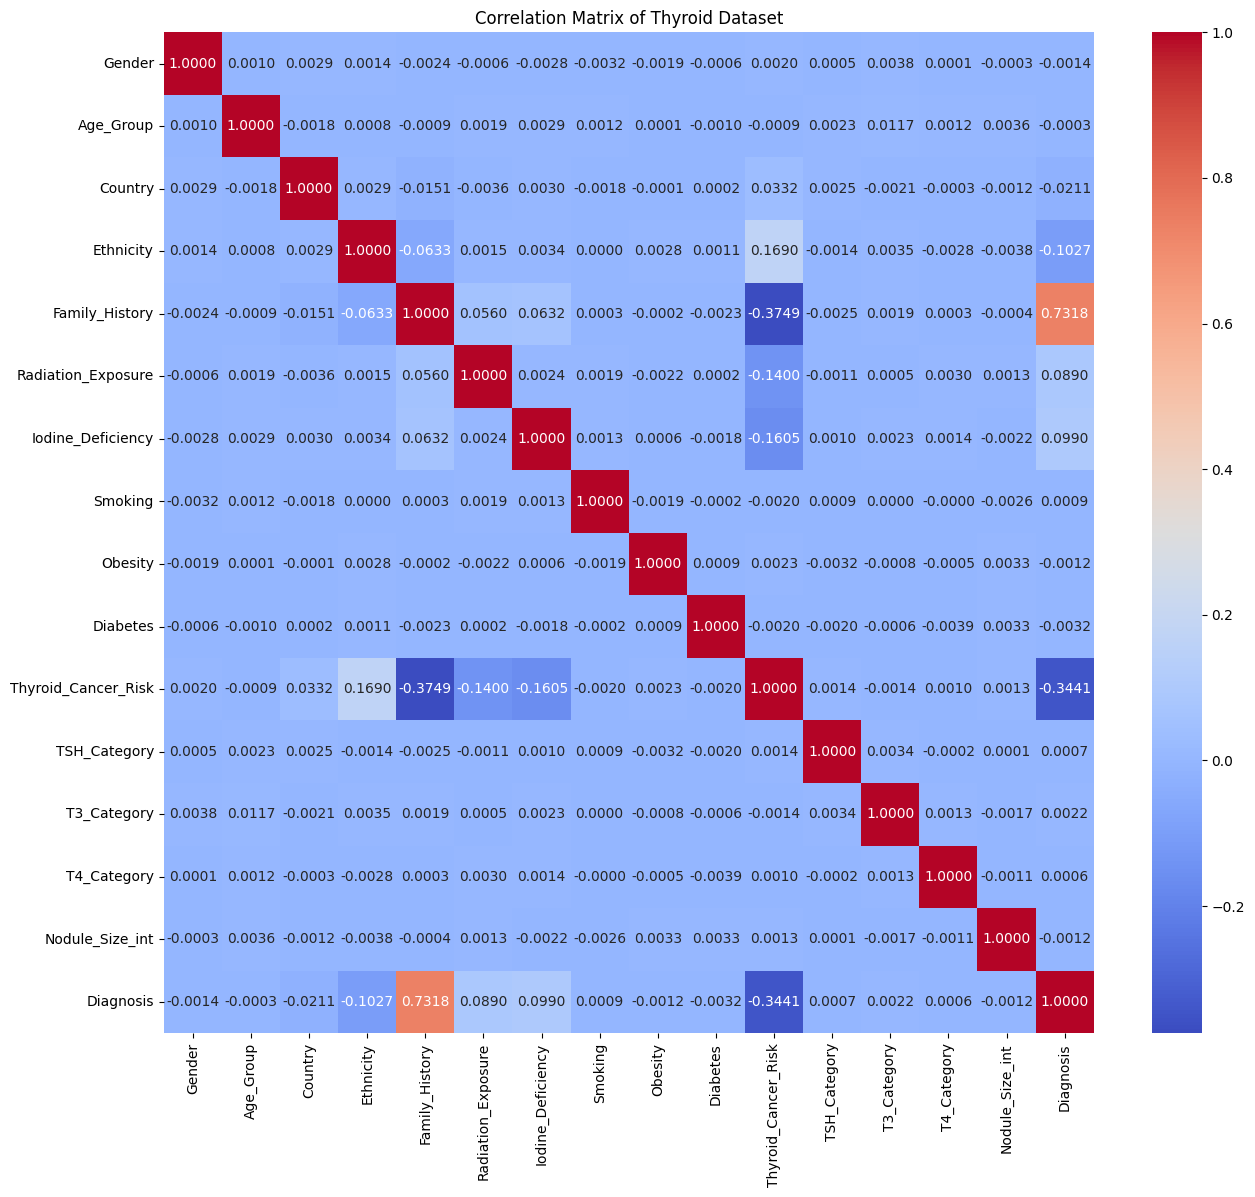

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 13))
sns.heatmap(thyroid_df.corr(), annot=True, cmap='coolwarm', fmt=".4f")
plt.title('Correlation Matrix of Thyroid Dataset')
plt.show()

In [19]:
thyroid_df['Diagnosis'].value_counts()

,count
Diagnosis,
0,163196
1,49495


## Decision Tree

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, recall_score, make_scorer, f1_score, precision_score

# แยก Features และ Target
X = thyroid_df[['Ethnicity', 'Family_History', 'Thyroid_Cancer_Risk', 'Radiation_Exposure', 'Iodine_Deficiency']]
y = thyroid_df['Diagnosis']

# แบ่งข้อมูล Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2025)

# สร้างโมเดล Decision Tree
dt_model = DecisionTreeClassifier(random_state=2025)

# ตั้งค่า hyperparameter สำหรับ GridSearchCV
param_grid = {
    'max_depth': [3, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'class_weight': [None, 'balanced',{0: 1, 1: 2.5}]
}

# Scorer
scorer = make_scorer(f1_score, pos_label=1)

# ใช้ GridSearchCV เพื่อลด False Negative
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# แสดงผลลัพธ์ที่ดีที่สุด
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score (Malignant):", grid_search.best_score_)

# ทำนายด้วยโมเดลที่ดีที่สุด
best_dt_model = grid_search.best_estimator_
y_pred = best_dt_model.predict(X_test)
y_pred_proba = best_dt_model.predict_proba(X_test)[:, 1]  # ใช้ความน่าจะเป็นสำหรับการคำนวณ ROC-AUC

# คำนวณค่า ROC-AUC สำหรับชุดทดสอบ
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Cross-validation สำหรับ ROC-AUC
cv_roc_auc_scores = cross_val_score(best_dt_model, X_train, y_train, cv=5, scoring='roc_auc')

# ประเมินผลลัพธ์
print("Cross-validation scores:", cv_roc_auc_scores)
print("Mean CV ROC-AUC:", cv_roc_auc_scores.mean())
print("Mean CV Accuracy:", cross_val_score(best_dt_model, X_train, y_train, cv=5).mean())
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Test Set Accuracy:", accuracy_score(y_test, y_pred))
print("Test Set ROC-AUC Score:", roc_auc)


Best Parameters: {'class_weight': None, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best F1 Score (Malignant): 0.7914656802056921
Cross-validation scores: [0.95899483 0.95917324 0.95839561 0.95809518 0.95805547]
Mean CV ROC-AUC: 0.958542863047437
Mean CV Accuracy: 0.915757680031982

Confusion Matrix:
 [[32103   462]
 [ 3036  6938]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95     32565
           1       0.94      0.70      0.80      9974

    accuracy                           0.92     42539
   macro avg       0.93      0.84      0.87     42539
weighted avg       0.92      0.92      0.91     42539

Test Set Accuracy: 0.9177695761536473
Test Set ROC-AUC Score: 0.9600313494342161


In [ ]:
y_train.value_counts()

,count
Diagnosis,
0,130631
1,39521


- รวม 170,152

In [ ]:
y_test.value_counts()

,count
Diagnosis,
0,32565
1,9974


- รวม 42,539

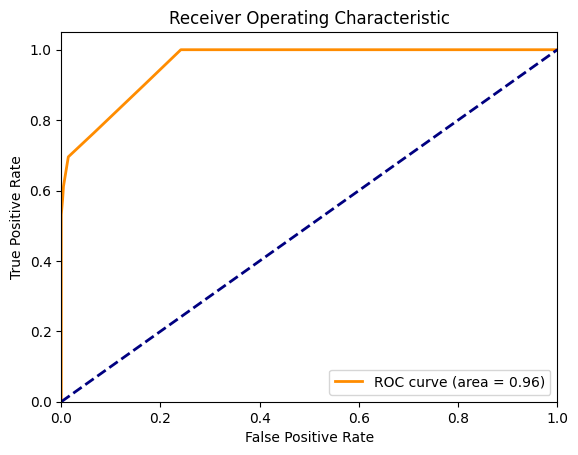

In [ ]:
# prompt: plot ROC-AUC

from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


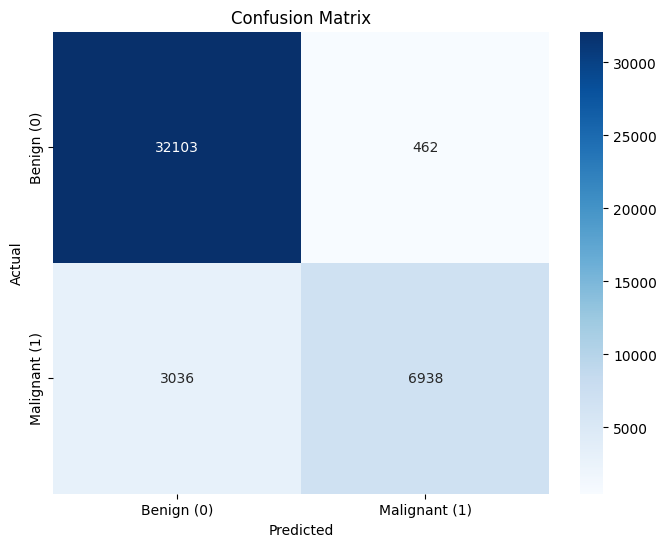

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Benign (0)', 'Malignant (1)'],
            yticklabels=['Benign (0)', 'Malignant (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


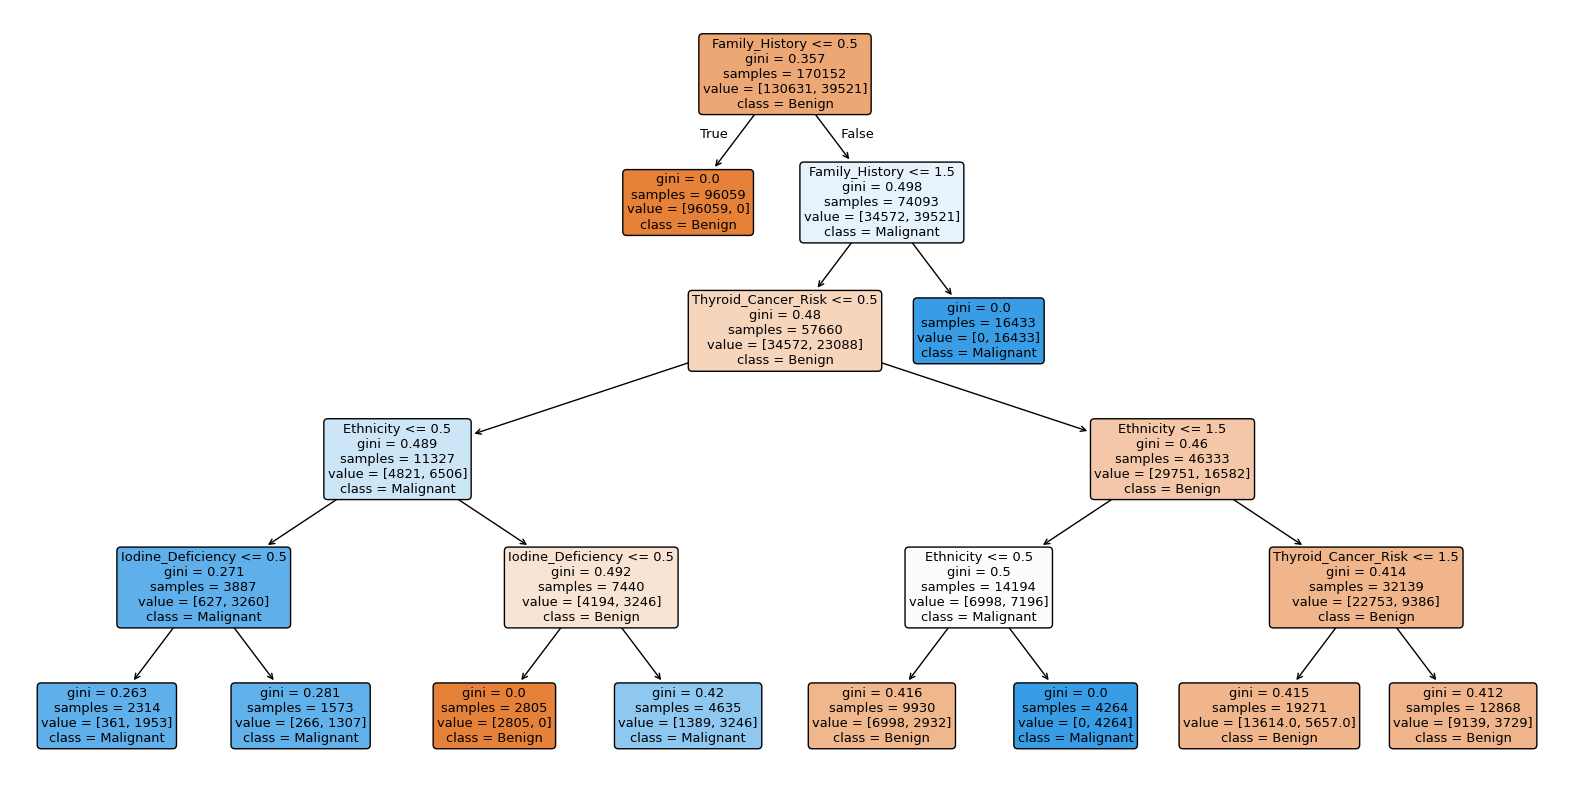

In [ ]:
# prompt: plot best_dt_model of Decision Tree

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(best_dt_model, filled=True, feature_names=X.columns, class_names=['Benign', 'Malignant'], rounded=True)
plt.show()




---



## Naive Bayes (Gaussian)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score,
                             roc_auc_score, make_scorer, f1_score)

# แยก Features และ Target
X = thyroid_df[['Ethnicity', 'Family_History', 'Thyroid_Cancer_Risk', 'Radiation_Exposure', 'Iodine_Deficiency']]
y = thyroid_df['Diagnosis']

# แบ่งข้อมูล Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2025)

# สร้างโมเดล Naive Bayes (Gaussian)
nb_model = GaussianNB()

# ตั้งค่า hyperparameter สำหรับ GridSearchCV
# สำหรับ GaussianNB เราสามารถปรับค่า var_smoothing ได้
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Scorer ที่เน้น F1 Score ของคลาส Malignant (label=1)
scorer = make_scorer(f1_score, pos_label=1)

# ใช้ GridSearchCV เพื่อค้นหา hyperparameter ที่ดีที่สุด
grid_search = GridSearchCV(estimator=nb_model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# แสดงผลลัพธ์ที่ดีที่สุด
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score (Malignant):", grid_search.best_score_)

# ทำนายด้วยโมเดลที่ดีที่สุด
best_nb_model = grid_search.best_estimator_
y_pred = best_nb_model.predict(X_test)
y_pred_proba = best_nb_model.predict_proba(X_test)[:, 1]  # ใช้ความน่าจะเป็นสำหรับการคำนวณ ROC-AUC

# คำนวณค่า ROC-AUC สำหรับชุดทดสอบ
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Cross-validation สำหรับ ROC-AUC
cv_roc_auc_scores = cross_val_score(best_nb_model, X_train, y_train, cv=5, scoring='roc_auc')

# ประเมินผลลัพธ์
print("Cross-validation ROC-AUC scores:", cv_roc_auc_scores)
print("Mean CV ROC-AUC:", cv_roc_auc_scores.mean())
print("Mean CV Accuracy:", cross_val_score(best_nb_model, X_train, y_train, cv=5).mean())
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Test Set Accuracy:", accuracy_score(y_test, y_pred))
print("Test Set ROC-AUC Score:", roc_auc)


Best Parameters: {'var_smoothing': 1e-05}
Best F1 Score (Malignant): 0.6957226036683019
Cross-validation ROC-AUC scores: [0.93965517 0.93844039 0.93769004 0.9372847  0.93824306]
Mean CV ROC-AUC: 0.9382626716728923
Mean CV Accuracy: 0.870451125645212

Confusion Matrix:
 [[30659  1906]
 [ 3550  6424]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92     32565
           1       0.77      0.64      0.70      9974

    accuracy                           0.87     42539
   macro avg       0.83      0.79      0.81     42539
weighted avg       0.87      0.87      0.87     42539

Test Set Accuracy: 0.8717412256987705
Test Set ROC-AUC Score: 0.9387874341551508


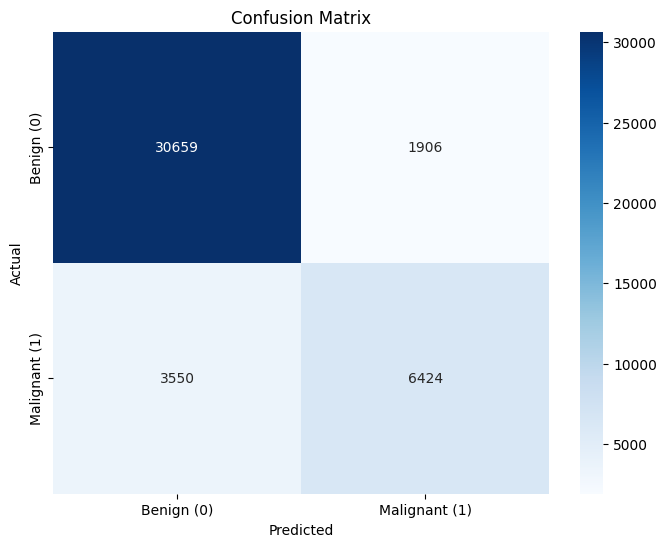

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Benign (0)', 'Malignant (1)'],
            yticklabels=['Benign (0)', 'Malignant (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

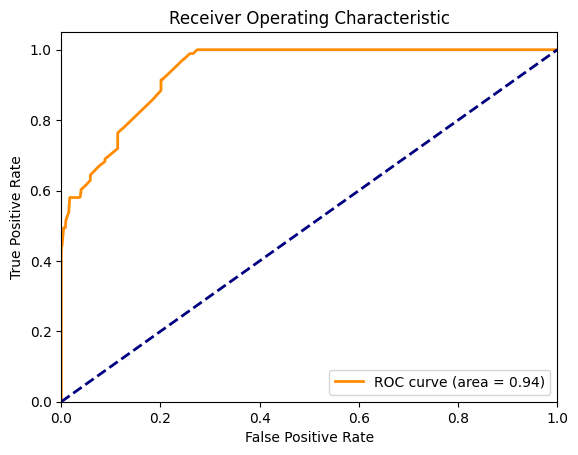

In [ ]:
# prompt: plot ROC-AUC

from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()



---



## Logistic Regression

https://builtin.com/articles/logistic-classifier#:~:text=Logistic%20regression%20is%20a%20classification%20technique%20used%20in%20machine%20learning,only%20be%20two%20possible%20classes.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score,
                             roc_auc_score, make_scorer, f1_score)

# แยก Features และ Target
X = thyroid_df[['Ethnicity', 'Family_History', 'Thyroid_Cancer_Risk', 'Radiation_Exposure', 'Iodine_Deficiency']]
y = thyroid_df['Diagnosis']

# แบ่งข้อมูล Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2025)

# สร้างโมเดล Logistic Regression
lr_model = LogisticRegression(random_state=2025, solver='liblinear')

# ตั้งค่า hyperparameter สำหรับ GridSearchCV
# ปรับค่า C สำหรับความแรงของ regularization และ class_weight เพื่อจัดการกับ class imbalance
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'class_weight': [None, 'balanced', {0: 1, 1: 2.5}]
}

# Scorer สำหรับ F1 Score ของคลาส Malignant (label=1)
scorer = make_scorer(f1_score, pos_label=1)

# ใช้ GridSearchCV เพื่อค้นหา hyperparameter ที่ดีที่สุด
grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# แสดงผลลัพธ์ที่ดีที่สุด
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score (Malignant):", grid_search.best_score_)

# ทำนายด้วยโมเดลที่ดีที่สุด
best_lr_model = grid_search.best_estimator_
y_pred = best_lr_model.predict(X_test)
y_pred_proba = best_lr_model.predict_proba(X_test)[:, 1]  # ใช้ความน่าจะเป็นสำหรับการคำนวณ ROC-AUC

# คำนวณค่า ROC-AUC สำหรับชุดทดสอบ
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Cross-validation สำหรับ ROC-AUC
cv_roc_auc_scores = cross_val_score(best_lr_model, X_train, y_train, cv=5, scoring='roc_auc')

# ประเมินผลลัพธ์
print("Cross-validation ROC-AUC scores:", cv_roc_auc_scores)
print("Mean CV ROC-AUC:", cv_roc_auc_scores.mean())
print("Mean CV Accuracy:", cross_val_score(best_lr_model, X_train, y_train, cv=5).mean())
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Test Set Accuracy:", accuracy_score(y_test, y_pred))
print("Test Set ROC-AUC Score:", roc_auc)


Best Parameters: {'C': 0.1, 'class_weight': None}
Best F1 Score (Malignant): 0.7051541575702261
Cross-validation ROC-AUC scores: [0.94099876 0.94022144 0.93939208 0.93917683 0.93993571]
Mean CV ROC-AUC: 0.9399449628375189
Mean CV Accuracy: 0.8842917034737987

Confusion Matrix:
 [[31684   881]
 [ 3974  6000]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93     32565
           1       0.87      0.60      0.71      9974

    accuracy                           0.89     42539
   macro avg       0.88      0.79      0.82     42539
weighted avg       0.88      0.89      0.88     42539

Test Set Accuracy: 0.885869437457392
Test Set ROC-AUC Score: 0.9406589668067115


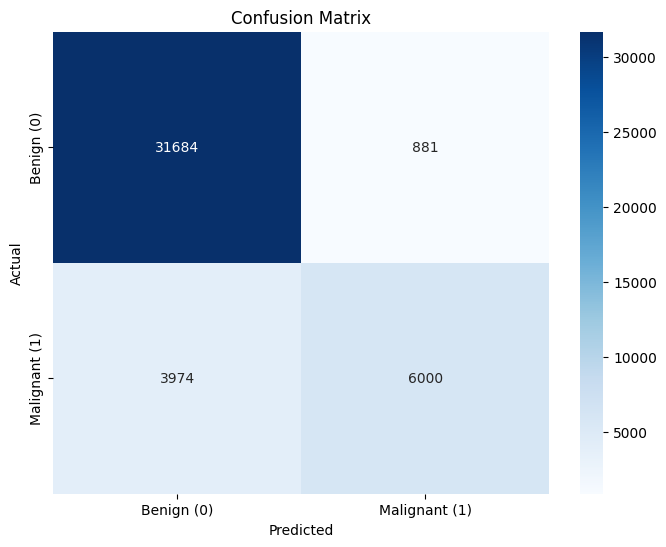

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Benign (0)', 'Malignant (1)'],
            yticklabels=['Benign (0)', 'Malignant (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

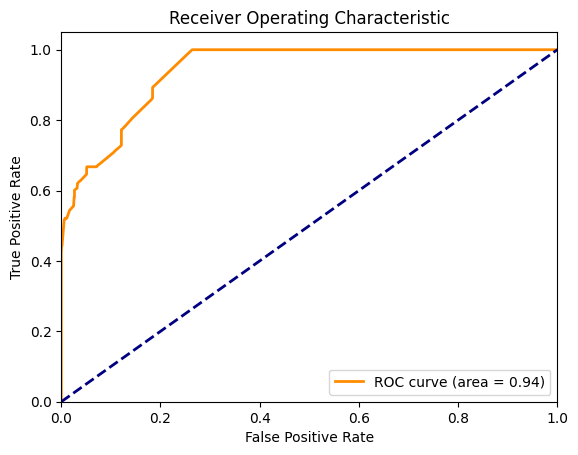

In [ ]:
# prompt: plot ROC-AUC

from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()



---



# Association Rule (Apriori)

In [ ]:
thyroid_df_selected = thyroid_df[thyroid_df['Diagnosis'] == 'Malignant']

In [ ]:
thyroid_df_selected.head()

,Gender,Age_Group,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,Thyroid_Cancer_Risk,TSH_Category,T3_Category,T4_Category,Nodule_Size_int,Diagnosis
6,Female,Senior,South Korea,Asian,Yes,Yes,No,No,Yes,No,High,High,Low,High,< 1,Malignant
8,Female,Teen,Russia,African,No,Yes,No,No,No,Yes,High,Normal,High,High,< 1,Malignant
10,Male,Senior,Nigeria,African,No,Yes,No,No,No,No,High,High,High,Normal,< 1,Malignant
12,Male,Adult,South Korea,Asian,Yes,No,No,No,No,Yes,High,High,Normal,Normal,4,Malignant
21,Female,Senior,Nigeria,Asian,No,No,No,No,Yes,Yes,Low,High,High,Normal,< 1,Malignant


## Groupby Patient ID

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder


transactions = []

for index, row in thyroid_df_selected.iterrows():
    transaction = [
        f'Gender={row["Gender"]}',
        f'Age_Group={row["Age_Group"]}',
        f'Country={row["Country"]}',
        f'Ethnicity={row["Ethnicity"]}',
        f'Family_History={row["Family_History"]}',
        f'Radiation_Exposure={row["Radiation_Exposure"]}',
        f'Iodine_Deficiency={row["Iodine_Deficiency"]}',
        f'Smoking={row["Smoking"]}',
        f'Obesity={row["Obesity"]}',
        f'Diabetes={row["Diabetes"]}',
        f'Thyroid_Cancer_Risk={row["Thyroid_Cancer_Risk"]}',
        f'TSH={row["TSH_Category"]}',
        f'T3={row["T3_Category"]}',
        f'T4={row["T4_Category"]}',
        f'Nodule_Size_int={row["Nodule_Size_int"]}',
        f'Diagnosis={row["Diagnosis"]}'
    ]
    transactions.append(transaction)


# ใช้ TransactionEncoder เพื่อเปลี่ยนเป็น one-hot encoded DataFrame
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# ใช้ apriori ในการหากฎการเชื่อมโยง
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.8)

# กรองกฎที่มี เป็น Consequent
filtered_rules = rules[rules['consequents'].apply(lambda x: 'Diagnosis=Malignant' in x)]

# เรียงลำดับกฎตามค่า support จากมากไปน้อย
filtered_rules = filtered_rules.sort_values(by='support', ascending=False)

# แสดงผลลัพธ์
for _, rule in filtered_rules.iterrows():
    antecedents = list(rule['antecedents'])
    consequents = list(rule['consequents'])
    print(f"Rule: {antecedents} , {consequents}")
    print(f"Support: {rule['support']}")
    print(f"Confidence: {rule['confidence']}")
    print(f"Lift: {rule['lift']}")
    print("--------")

Rule: ['T4=Normal'] , ['Diagnosis=Malignant']
Support: 0.9347408829174664
Confidence: 1.0
Lift: 1.0
--------
Rule: ['Diabetes=No'] , ['Diagnosis=Malignant']
Support: 0.8020810182846753
Confidence: 1.0
Lift: 1.0
--------
Rule: ['Smoking=No'] , ['Diagnosis=Malignant']
Support: 0.7998787756339024
Confidence: 1.0
Lift: 1.0
--------
Rule: ['Radiation_Exposure=No'] , ['Diagnosis=Malignant']
Support: 0.7925042933629659
Confidence: 1.0
Lift: 1.0
--------
Rule: ['T4=Normal'] , ['Diabetes=No', 'Diagnosis=Malignant']
Support: 0.7499343368016972
Confidence: 0.8022911488166001
Lift: 1.0002619816790757
--------
Rule: ['T4=Normal', 'Diabetes=No'] , ['Diagnosis=Malignant']
Support: 0.7499343368016972
Confidence: 1.0
Lift: 1.0
--------
Rule: ['Diabetes=No'] , ['T4=Normal', 'Diagnosis=Malignant']
Support: 0.7499343368016972
Confidence: 0.9349857679034737
Lift: 1.0002619816790757
--------
Rule: ['Smoking=No'] , ['T4=Normal', 'Diagnosis=Malignant']
Support: 0.7483584200424285
Confidence: 0.935589795402879

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


## Asian

In [ ]:
Asian = thyroid_df_selected[thyroid_df_selected['Ethnicity'] == 'Asian']

In [ ]:
Asian.head()

,Gender,Age_Group,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,Thyroid_Cancer_Risk,TSH_Category,T3_Category,T4_Category,Nodule_Size_int,Diagnosis
6,Female,Senior,South Korea,Asian,Yes,Yes,No,No,Yes,No,High,High,Low,High,< 1,Malignant
12,Male,Adult,South Korea,Asian,Yes,No,No,No,No,Yes,High,High,Normal,Normal,4,Malignant
21,Female,Senior,Nigeria,Asian,No,No,No,No,Yes,Yes,Low,High,High,Normal,< 1,Malignant
25,Male,Adult,Russia,Asian,Yes,No,No,Yes,No,No,High,High,Normal,Normal,4,Malignant
29,Female,Senior,India,Asian,Yes,No,No,Yes,No,No,High,High,Normal,Normal,4,Malignant


In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder


transactions = []

for index, row in Asian.iterrows():
    transaction = [
        f'Gender={row["Gender"]}',
        f'Age_Group={row["Age_Group"]}',
        f'Country={row["Country"]}',
        f'Ethnicity={row["Ethnicity"]}',
        f'Family_History={row["Family_History"]}',
        f'Radiation_Exposure={row["Radiation_Exposure"]}',
        f'Iodine_Deficiency={row["Iodine_Deficiency"]}',
        f'Smoking={row["Smoking"]}',
        f'Obesity={row["Obesity"]}',
        f'Diabetes={row["Diabetes"]}',
        f'Thyroid_Cancer_Risk={row["Thyroid_Cancer_Risk"]}',
        f'TSH={row["TSH_Category"]}',
        f'T3={row["T3_Category"]}',
        f'T4={row["T4_Category"]}',
        f'Nodule_Size_int={row["Nodule_Size_int"]}',
        f'Diagnosis={row["Diagnosis"]}'
    ]
    transactions.append(transaction)


# ใช้ TransactionEncoder เพื่อเปลี่ยนเป็น one-hot encoded DataFrame
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# ใช้ apriori ในการหากฎการเชื่อมโยง
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.8)

# กรองกฎที่มี เป็น Consequent
filtered_rules = rules[rules['consequents'].apply(lambda x: 'Diagnosis=Malignant' in x)]

# เรียงลำดับกฎตามค่า support จากมากไปน้อย
filtered_rules = filtered_rules.sort_values(by='support', ascending=False)

# แสดงผลลัพธ์
for _, rule in filtered_rules.iterrows():
    antecedents = list(rule['antecedents'])
    consequents = list(rule['consequents'])
    print(f"Rule: {antecedents} , {consequents}")
    print(f"Support: {rule['support']}")
    print(f"Confidence: {rule['confidence']}")
    print(f"Lift: {rule['lift']}")
    print("--------")

Rule: ['Ethnicity=Asian'] , ['Diagnosis=Malignant']
Support: 1.0
Confidence: 1.0
Lift: 1.0
--------
Rule: ['Ethnicity=Asian'] , ['T4=Normal', 'Diagnosis=Malignant']
Support: 0.9362514029180696
Confidence: 0.9362514029180696
Lift: 1.0
--------
Rule: ['T4=Normal'] , ['Diagnosis=Malignant', 'Ethnicity=Asian']
Support: 0.9362514029180696
Confidence: 1.0
Lift: 1.0
--------
Rule: ['T4=Normal', 'Ethnicity=Asian'] , ['Diagnosis=Malignant']
Support: 0.9362514029180696
Confidence: 1.0
Lift: 1.0
--------
Rule: ['T4=Normal'] , ['Diagnosis=Malignant']
Support: 0.9362514029180696
Confidence: 1.0
Lift: 1.0
--------
Rule: ['Ethnicity=Asian', 'Radiation_Exposure=No'] , ['Diagnosis=Malignant']
Support: 0.8525252525252526
Confidence: 1.0
Lift: 1.0
--------
Rule: ['Radiation_Exposure=No'] , ['Diagnosis=Malignant']
Support: 0.8525252525252526
Confidence: 1.0
Lift: 1.0
--------
Rule: ['Ethnicity=Asian'] , ['Diagnosis=Malignant', 'Radiation_Exposure=No']
Support: 0.8525252525252526
Confidence: 0.852525252525

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


## Caucasion

In [ ]:
Caucasian = thyroid_df_selected[thyroid_df_selected['Ethnicity'] == 'Caucasian']

In [ ]:
Caucasian.head()

,Gender,Age_Group,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,Thyroid_Cancer_Risk,TSH_Category,T3_Category,T4_Category,Nodule_Size_int,Diagnosis
22,Male,Senior,India,Caucasian,No,Yes,No,No,Yes,No,Low,Normal,High,Normal,2,Malignant
38,Male,Adult,South Korea,Caucasian,Yes,No,No,Yes,No,No,Medium,High,High,Normal,4,Malignant
49,Male,Adult,Nigeria,Caucasian,No,No,No,No,Yes,Yes,Low,High,High,Normal,4,Malignant
69,Female,Senior,India,Caucasian,No,No,No,No,No,No,Low,High,Normal,Normal,< 1,Malignant
81,Female,Senior,Nigeria,Caucasian,No,Yes,Yes,No,Yes,Yes,Medium,High,High,Normal,< 1,Malignant


In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder


transactions = []

for index, row in Caucasian.iterrows():
    transaction = [
        f'Gender={row["Gender"]}',
        f'Age_Group={row["Age_Group"]}',
        f'Country={row["Country"]}',
        f'Ethnicity={row["Ethnicity"]}',
        f'Family_History={row["Family_History"]}',
        f'Radiation_Exposure={row["Radiation_Exposure"]}',
        f'Iodine_Deficiency={row["Iodine_Deficiency"]}',
        f'Smoking={row["Smoking"]}',
        f'Obesity={row["Obesity"]}',
        f'Diabetes={row["Diabetes"]}',
        f'Thyroid_Cancer_Risk={row["Thyroid_Cancer_Risk"]}',
        f'TSH={row["TSH_Category"]}',
        f'T3={row["T3_Category"]}',
        f'T4={row["T4_Category"]}',
        f'Nodule_Size_int={row["Nodule_Size_int"]}',
        f'Diagnosis={row["Diagnosis"]}'
    ]
    transactions.append(transaction)


# ใช้ TransactionEncoder เพื่อเปลี่ยนเป็น one-hot encoded DataFrame
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# ใช้ apriori ในการหากฎการเชื่อมโยง
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.8)

# กรองกฎที่มี เป็น Consequent
filtered_rules = rules[rules['consequents'].apply(lambda x: 'Diagnosis=Malignant' in x)]

# เรียงลำดับกฎตามค่า support จากมากไปน้อย
filtered_rules = filtered_rules.sort_values(by='support', ascending=False)

# แสดงผลลัพธ์
for _, rule in filtered_rules.iterrows():
    antecedents = list(rule['antecedents'])
    consequents = list(rule['consequents'])
    print(f"Rule: {antecedents} , {consequents}")
    print(f"Support: {rule['support']}")
    print(f"Confidence: {rule['confidence']}")
    print(f"Lift: {rule['lift']}")
    print("--------")

Rule: ['Ethnicity=Caucasian'] , ['Diagnosis=Malignant']
Support: 1.0
Confidence: 1.0
Lift: 1.0
--------
Rule: ['T4=Normal', 'Ethnicity=Caucasian'] , ['Diagnosis=Malignant']
Support: 0.9321661094492346
Confidence: 1.0
Lift: 1.0
--------
Rule: ['T4=Normal'] , ['Diagnosis=Malignant', 'Ethnicity=Caucasian']
Support: 0.9321661094492346
Confidence: 1.0
Lift: 1.0
--------
Rule: ['Ethnicity=Caucasian'] , ['T4=Normal', 'Diagnosis=Malignant']
Support: 0.9321661094492346
Confidence: 0.9321661094492346
Lift: 1.0
--------
Rule: ['T4=Normal'] , ['Diagnosis=Malignant']
Support: 0.9321661094492346
Confidence: 1.0
Lift: 1.0
--------
Rule: ['Ethnicity=Caucasian'] , ['Diagnosis=Malignant', 'Radiation_Exposure=No']
Support: 0.8526306528242126
Confidence: 0.8526306528242126
Lift: 1.0
--------
Rule: ['Ethnicity=Caucasian', 'Radiation_Exposure=No'] , ['Diagnosis=Malignant']
Support: 0.8526306528242126
Confidence: 1.0
Lift: 1.0
--------
Rule: ['Radiation_Exposure=No'] , ['Diagnosis=Malignant', 'Ethnicity=Cauc

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


## African

In [ ]:
African = thyroid_df_selected[thyroid_df_selected['Ethnicity'] == 'African']

In [ ]:
African.head()

,Gender,Age_Group,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,Thyroid_Cancer_Risk,TSH_Category,T3_Category,T4_Category,Nodule_Size_int,Diagnosis
8,Female,Teen,Russia,African,No,Yes,No,No,No,Yes,High,Normal,High,High,< 1,Malignant
10,Male,Senior,Nigeria,African,No,Yes,No,No,No,No,High,High,High,Normal,< 1,Malignant
33,Male,Teen,India,African,No,No,Yes,No,Yes,No,High,Normal,High,Normal,3,Malignant
47,Male,Senior,China,African,No,No,No,No,No,No,Low,Normal,High,Normal,< 1,Malignant
56,Male,Adult,USA,African,No,No,Yes,Yes,No,No,Low,High,Normal,Normal,4,Malignant


In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder


transactions = []

for index, row in African.iterrows():
    transaction = [
        f'Gender={row["Gender"]}',
        f'Age_Group={row["Age_Group"]}',
        f'Country={row["Country"]}',
        f'Ethnicity={row["Ethnicity"]}',
        f'Family_History={row["Family_History"]}',
        f'Radiation_Exposure={row["Radiation_Exposure"]}',
        f'Iodine_Deficiency={row["Iodine_Deficiency"]}',
        f'Smoking={row["Smoking"]}',
        f'Obesity={row["Obesity"]}',
        f'Diabetes={row["Diabetes"]}',
        f'Thyroid_Cancer_Risk={row["Thyroid_Cancer_Risk"]}',
        f'TSH={row["TSH_Category"]}',
        f'T3={row["T3_Category"]}',
        f'T4={row["T4_Category"]}',
        f'Nodule_Size_int={row["Nodule_Size_int"]}',
        f'Diagnosis={row["Diagnosis"]}'
    ]
    transactions.append(transaction)


# ใช้ TransactionEncoder เพื่อเปลี่ยนเป็น one-hot encoded DataFrame
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# ใช้ apriori ในการหากฎการเชื่อมโยง
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.8)

# กรองกฎที่มี เป็น Consequent
filtered_rules = rules[rules['consequents'].apply(lambda x: 'Diagnosis=Malignant' in x)]

# เรียงลำดับกฎตามค่า support จากมากไปน้อย
filtered_rules = filtered_rules.sort_values(by='support', ascending=False)

# แสดงผลลัพธ์
for _, rule in filtered_rules.iterrows():
    antecedents = list(rule['antecedents'])
    consequents = list(rule['consequents'])
    print(f"Rule: {antecedents} , {consequents}")
    print(f"Support: {rule['support']}")
    print(f"Confidence: {rule['confidence']}")
    print(f"Lift: {rule['lift']}")
    print("--------")

Rule: ['Ethnicity=African'] , ['Diagnosis=Malignant']
Support: 1.0
Confidence: 1.0
Lift: 1.0
--------
Rule: ['T4=Normal', 'Ethnicity=African'] , ['Diagnosis=Malignant']
Support: 0.934931506849315
Confidence: 1.0
Lift: 1.0
--------
Rule: ['T4=Normal'] , ['Diagnosis=Malignant', 'Ethnicity=African']
Support: 0.934931506849315
Confidence: 1.0
Lift: 1.0
--------
Rule: ['Ethnicity=African'] , ['T4=Normal', 'Diagnosis=Malignant']
Support: 0.934931506849315
Confidence: 0.934931506849315
Lift: 1.0
--------
Rule: ['T4=Normal'] , ['Diagnosis=Malignant']
Support: 0.934931506849315
Confidence: 1.0
Lift: 1.0
--------
Rule: ['Smoking=No'] , ['Diagnosis=Malignant', 'Ethnicity=African']
Support: 0.8043317289892632
Confidence: 1.0
Lift: 1.0
--------
Rule: ['Ethnicity=African'] , ['Smoking=No', 'Diagnosis=Malignant']
Support: 0.8043317289892632
Confidence: 0.8043317289892632
Lift: 1.0
--------
Rule: ['Smoking=No'] , ['Diagnosis=Malignant']
Support: 0.8043317289892632
Confidence: 1.0
Lift: 1.0
--------
Ru

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


## Middle Eastern

In [ ]:
MiddleES = thyroid_df_selected[thyroid_df_selected['Ethnicity'] == 'Middle Eastern']

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder


transactions = []

for index, row in MiddleES.iterrows():
    transaction = [
        f'Gender={row["Gender"]}',
        f'Age_Group={row["Age_Group"]}',
        f'Country={row["Country"]}',
        f'Ethnicity={row["Ethnicity"]}',
        f'Family_History={row["Family_History"]}',
        f'Radiation_Exposure={row["Radiation_Exposure"]}',
        f'Iodine_Deficiency={row["Iodine_Deficiency"]}',
        f'Smoking={row["Smoking"]}',
        f'Obesity={row["Obesity"]}',
        f'Diabetes={row["Diabetes"]}',
        f'Thyroid_Cancer_Risk={row["Thyroid_Cancer_Risk"]}',
        f'TSH={row["TSH_Category"]}',
        f'T3={row["T3_Category"]}',
        f'T4={row["T4_Category"]}',
        f'Nodule_Size_int={row["Nodule_Size_int"]}',
        f'Diagnosis={row["Diagnosis"]}'
    ]
    transactions.append(transaction)


# ใช้ TransactionEncoder เพื่อเปลี่ยนเป็น one-hot encoded DataFrame
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# ใช้ apriori ในการหากฎการเชื่อมโยง
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.8)

# กรองกฎที่มี เป็น Consequent
filtered_rules = rules[rules['consequents'].apply(lambda x: 'Diagnosis=Malignant' in x)]

# เรียงลำดับกฎตามค่า support จากมากไปน้อย
filtered_rules = filtered_rules.sort_values(by='support', ascending=False)

# แสดงผลลัพธ์
for _, rule in filtered_rules.iterrows():
    antecedents = list(rule['antecedents'])
    consequents = list(rule['consequents'])
    print(f"Rule: {antecedents} , {consequents}")
    print(f"Support: {rule['support']}")
    print(f"Confidence: {rule['confidence']}")
    print(f"Lift: {rule['lift']}")
    print("--------")

Rule: ['Ethnicity=Middle Eastern'] , ['Diagnosis=Malignant']
Support: 1.0
Confidence: 1.0
Lift: 1.0
--------
Rule: ['T4=Normal', 'Ethnicity=Middle Eastern'] , ['Diagnosis=Malignant']
Support: 0.9283847360167277
Confidence: 1.0
Lift: 1.0
--------
Rule: ['T4=Normal'] , ['Diagnosis=Malignant', 'Ethnicity=Middle Eastern']
Support: 0.9283847360167277
Confidence: 1.0
Lift: 1.0
--------
Rule: ['T4=Normal'] , ['Diagnosis=Malignant']
Support: 0.9283847360167277
Confidence: 1.0
Lift: 1.0
--------
Rule: ['Ethnicity=Middle Eastern'] , ['T4=Normal', 'Diagnosis=Malignant']
Support: 0.9283847360167277
Confidence: 0.9283847360167277
Lift: 1.0
--------
Rule: ['Radiation_Exposure=No'] , ['Diagnosis=Malignant', 'Ethnicity=Middle Eastern']
Support: 0.8423941453214846
Confidence: 1.0
Lift: 1.0
--------
Rule: ['Ethnicity=Middle Eastern'] , ['Diagnosis=Malignant', 'Radiation_Exposure=No']
Support: 0.8423941453214846
Confidence: 0.8423941453214846
Lift: 1.0
--------
Rule: ['Ethnicity=Middle Eastern', 'Radiati

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


## Hispanic

In [ ]:
Hispanic = thyroid_df_selected[thyroid_df_selected['Ethnicity'] == 'Hispanic']

In [ ]:
Hispanic.head()

,Gender,Age_Group,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,Thyroid_Cancer_Risk,TSH_Category,T3_Category,T4_Category,Nodule_Size_int,Diagnosis
75,Female,Senior,Russia,Hispanic,No,No,No,No,Yes,No,Medium,High,High,Normal,< 1,Malignant
105,Male,Adult,USA,Hispanic,Yes,No,No,No,No,Yes,Low,High,High,Normal,3,Malignant
126,Female,Adult,South Korea,Hispanic,No,No,No,No,Yes,No,Low,High,High,Normal,3,Malignant
198,Female,Senior,India,Hispanic,No,No,No,No,Yes,Yes,Medium,High,Normal,Normal,4,Malignant
251,Female,Adult,Russia,Hispanic,No,No,Yes,No,No,No,Low,High,High,Normal,< 1,Malignant


In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder


transactions = []

for index, row in Hispanic.iterrows():
    transaction = [
        f'Gender={row["Gender"]}',
        f'Age_Group={row["Age_Group"]}',
        f'Country={row["Country"]}',
        f'Ethnicity={row["Ethnicity"]}',
        f'Family_History={row["Family_History"]}',
        f'Radiation_Exposure={row["Radiation_Exposure"]}',
        f'Iodine_Deficiency={row["Iodine_Deficiency"]}',
        f'Smoking={row["Smoking"]}',
        f'Obesity={row["Obesity"]}',
        f'Diabetes={row["Diabetes"]}',
        f'Thyroid_Cancer_Risk={row["Thyroid_Cancer_Risk"]}',
        f'TSH={row["TSH_Category"]}',
        f'T3={row["T3_Category"]}',
        f'T4={row["T4_Category"]}',
        f'Nodule_Size_int={row["Nodule_Size_int"]}',
        f'Diagnosis={row["Diagnosis"]}'
    ]
    transactions.append(transaction)


# ใช้ TransactionEncoder เพื่อเปลี่ยนเป็น one-hot encoded DataFrame
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# ใช้ apriori ในการหากฎการเชื่อมโยง
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.8)

# กรองกฎที่มี เป็น Consequent
filtered_rules = rules[rules['consequents'].apply(lambda x: 'Diagnosis=Malignant' in x)]

# เรียงลำดับกฎตามค่า support จากมากไปน้อย
filtered_rules = filtered_rules.sort_values(by='support', ascending=False)

# แสดงผลลัพธ์
for _, rule in filtered_rules.iterrows():
    antecedents = list(rule['antecedents'])
    consequents = list(rule['consequents'])
    print(f"Rule: {antecedents} , {consequents}")
    print(f"Support: {rule['support']}")
    print(f"Confidence: {rule['confidence']}")
    print(f"Lift: {rule['lift']}")
    print("--------")

Rule: ['Ethnicity=Hispanic'] , ['Diagnosis=Malignant']
Support: 1.0
Confidence: 1.0
Lift: 1.0
--------
Rule: ['T4=Normal', 'Ethnicity=Hispanic'] , ['Diagnosis=Malignant']
Support: 0.9390737805951752
Confidence: 1.0
Lift: 1.0
--------
Rule: ['Ethnicity=Hispanic'] , ['T4=Normal', 'Diagnosis=Malignant']
Support: 0.9390737805951752
Confidence: 0.9390737805951752
Lift: 1.0
--------
Rule: ['T4=Normal'] , ['Diagnosis=Malignant', 'Ethnicity=Hispanic']
Support: 0.9390737805951752
Confidence: 1.0
Lift: 1.0
--------
Rule: ['T4=Normal'] , ['Diagnosis=Malignant']
Support: 0.9390737805951752
Confidence: 1.0
Lift: 1.0
--------
Rule: ['Ethnicity=Hispanic', 'Radiation_Exposure=No'] , ['Diagnosis=Malignant']
Support: 0.8420496566296883
Confidence: 1.0
Lift: 1.0
--------
Rule: ['Radiation_Exposure=No'] , ['Diagnosis=Malignant']
Support: 0.8420496566296883
Confidence: 1.0
Lift: 1.0
--------
Rule: ['Radiation_Exposure=No'] , ['Diagnosis=Malignant', 'Ethnicity=Hispanic']
Support: 0.8420496566296883
Confiden

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)
